In [4]:
!pip install -q torch torchvision torchaudio

In [5]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 922.7 kB/s eta 0:00:0031m2.6 MB/s eta 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=f6409f68261028cd7fe05b60f8cf5d555e8a3d2680cacee1ae1715251cba51a2
  Stored in directory: /Users/prakanan/Library/Caches/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


In [6]:
import torch

/Users/prakanan/opt/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 kB 2.1 MB/s eta 0:00:003.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.3/384.3 kB 7.3 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [9]:
import torch

In [11]:
print(torch.cuda.is_available())

False


### PyTorch as Derivate calculator

In [13]:
# f(x1,x2,x3,x4) = x1**3x2 + x3x4

In [26]:
def get_function(x1_val=0, x2_val=0, x3_val=0, x4_val=0):
    #variables
    x1 = torch.tensor(x1_val, requires_grad=True, dtype=torch.float32)
    x2 = torch.tensor(x2_val, requires_grad=True, dtype=torch.float32)
    x3 = torch.tensor(x3_val, requires_grad=True, dtype=torch.float32)
    x4 = torch.tensor(x4_val, requires_grad=True, dtype=torch.float32)
    #function
    p1 = x1.pow(3)
    m1 = p1 * x2
    m2 = x3 * x4
    f = m1 + m2
    vars = {'x1': x1,'x2': x2, 'x3': x3, 'x4': x4}
    return f, vars

In [15]:
f, _ = get_function(2,4,3,5)

In [16]:
f

tensor(47., grad_fn=<AddBackward0>)

In [21]:
f.item()

47.0

In NN During backpropagation process, we find derivates $\frac{\partial f}{\partial x}$ for each weight. It computes partial derivates of any multivariable function. The derivative of the coposite function is calculated using the chain rule:
$[f(g(x))]'$ = $f'(g(x))$ * $g'(x)$.

In [24]:
from torchviz import make_dot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [27]:
f, params = get_function(2, 4, 3, 5)

In [28]:
f

tensor(47., grad_fn=<AddBackward0>)

In [29]:
params

{'x1': tensor(2., requires_grad=True),
 'x2': tensor(4., requires_grad=True),
 'x3': tensor(3., requires_grad=True),
 'x4': tensor(5., requires_grad=True)}

In [33]:
make_dot(f, params).render('f_torchviz')

'f_torchviz.png.pdf'

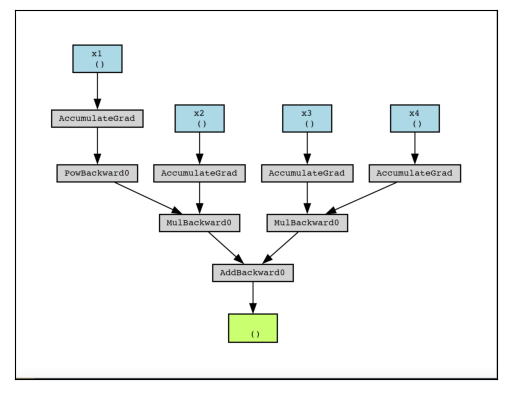

In [34]:
img = mpimg.imread('f_torchviz.png')
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

Calculate partial derivate $\frac{\partial f}{\partial x1}$:

In [ ]:
# f(x1,x2,x3,x4) = x1**3x2 + x3x4 = 3x1**2.x2 = 3.2^2.4 = 48

In [41]:
from torch.autograd import grad
f, params = get_function(2, 4, 3, 5)

In [42]:
print(f)
print(params)

tensor(47., grad_fn=<AddBackward0>)
{'x1': tensor(2., requires_grad=True), 'x2': tensor(4., requires_grad=True), 'x3': tensor(3., requires_grad=True), 'x4': tensor(5., requires_grad=True)}


In [43]:
df_dx1 = grad(outputs=f, inputs=[params['x1']])
print(df_dx1)

(tensor(48.),)


In [45]:
f, params = get_function(2, 4, 3, 5)
df_dx = grad(outputs=f, inputs=params.values())
print(df_dx)

(tensor(48.), tensor(8.), tensor(5.), tensor(3.))


### PyTorch Basics

Tensors : The main objects of PyTorch operations are tensors. It is a multi-dimensional matrix containing elements of a single data type.

#### Tensor Creation

In [46]:
x = torch.tensor(data=[1, 2, 3])
print(x)

tensor([1, 2, 3])


In [47]:
x = torch.tensor(data=[[1, 2, 3], [4, 5, 6]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [48]:
x = torch.tensor(data=[1.3, .5], dtype=torch.float32)
print(x)

tensor([1.3000, 0.5000])


In [49]:
# If you want to take derivate on the tensor:
x = torch.tensor(data=[1.3, .5], dtype=torch.float32, requires_grad=True)

In [50]:
x

tensor([1.3000, 0.5000], requires_grad=True)

In [119]:
import numpy as np

In [120]:
numpy_array = np.random.rand(3,4)
numpy_array

array([[0.82543207, 0.94212346, 0.145946  , 0.97396318],
       [0.67519807, 0.59373419, 0.01320054, 0.76883132],
       [0.16719915, 0.77464445, 0.2307833 , 0.27662111]])

In [121]:
numpy_array.ndim

2

In [122]:
torch.from_numpy(numpy_array)

tensor([[0.8254, 0.9421, 0.1459, 0.9740],
        [0.6752, 0.5937, 0.0132, 0.7688],
        [0.1672, 0.7746, 0.2308, 0.2766]], dtype=torch.float64)

In [123]:
torch.tensor(numpy_array)

tensor([[0.8254, 0.9421, 0.1459, 0.9740],
        [0.6752, 0.5937, 0.0132, 0.7688],
        [0.1672, 0.7746, 0.2308, 0.2766]], dtype=torch.float64)

In [124]:
my_tensor = torch.rand(3, 4)

In [127]:
print(my_tensor.ndim)
print(my_tensor.size())

2
torch.Size([3, 4])


In [128]:
print(my_tensor.dtype)
print(my_tensor.device)

torch.float32
cpu


In [ ]:
# to move from cpu to gpu
# my_tensor = my_tensor.to("cuda")

In [129]:
my_tensor

tensor([[0.5695, 0.4388, 0.6387, 0.5247],
        [0.6826, 0.3051, 0.4635, 0.4550],
        [0.5725, 0.4980, 0.9371, 0.6556]])

In [131]:
my_tensor[:, 1:3]

tensor([[0.4388, 0.6387],
        [0.3051, 0.4635],
        [0.4980, 0.9371]])

#### Random Tensor

A deep learning model initiates with random sets of weights. 

In [78]:
# Random 3-D tensor
x = torch.rand(1, 3, 3)
print(x)

tensor([[[0.1834, 0.9080, 0.5626],
         [0.7362, 0.9753, 0.5969],
         [0.3892, 0.4088, 0.0898]]])


In [79]:
print(f'Dimension: ', x.ndim)
print(f'Shape: ',x.shape)

Dimension:  3
Shape:  torch.Size([1, 3, 3])


In [80]:
torch.manual_seed(1)

#### Common tensor types

##### Zeros

In [81]:
x = torch.zeros((2,2))
print(x)

tensor([[0., 0.],
        [0., 0.]])


In [85]:
x = torch.zeros((5,2))
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


##### Ones

In [86]:
x = torch.ones((5,2))
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


##### eye - Identity tensor

In [89]:
x = torch.eye(4)
print(x)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


#### Tensor methods and attributes

##### reshape

In [95]:
x = torch.tensor([1, 2, 3, 4])
print(x)
print(x.ndim)
print(x.shape)
print(x.size())

tensor([1, 2, 3, 4])
1
torch.Size([4])
torch.Size([4])


In [96]:
y = x.reshape((2,2))
print(y)
print(y.ndim)
print(y.shape)
print(y.size())

tensor([[1, 2],
        [3, 4]])
2
torch.Size([2, 2])
torch.Size([2, 2])


##### tolist, backward

In [97]:
x = torch.tensor([[1, 2], [3, 4]])
x

tensor([[1, 2],
        [3, 4]])

In [102]:
y = x.tolist()
print(y)
print(type(y))

[[1, 2], [3, 4]]
<class 'list'>


In [108]:
x = torch.tensor(data=[3], dtype=torch.float32, requires_grad=True)
f = x.pow(2)

In [109]:
f

tensor([9.], grad_fn=<PowBackward0>)

In [110]:
f.backward()

In [111]:
x.grad.item()

6.0

#### Math Functions

abs : Computes absolute value for each element in tensor

add : Adds a scalar to each element of a tensor

ceil : Retruns a nw tensor with the smallest integer greater than or equal to each element of a tensor

dist : Returns the p-norm between 2 tensors. If p=2, then dist returns Euclidian norm

div : Divides each elements of the tesor

eq : Computes element-wise equality

floor : Returns a new tensor with te largest integer less than or equal to each element of a tenssor

mean : Returns mean value of all elements in the tensor

pow : Takes power of each element in the tensor

max : Returns the max value of all elements in the tensor

min : Return the min values of all elements in the tensor

round : Returns a new tensor with each of the elements of the tensor rounded to the closest integer

sign : Returns a new tensor with the signs of the elements of input tensor

sum :  Returns the sum of all elements in the input tensor

In [132]:
my_tensor.mul(my_tensor)

tensor([[0.3243, 0.1925, 0.4079, 0.2753],
        [0.4660, 0.0931, 0.2149, 0.2070],
        [0.3277, 0.2480, 0.8781, 0.4298]])

In [133]:
my_tensor.matmul(my_tensor.T)

tensor([[1.2001, 1.0574, 1.4870],
        [1.0574, 0.9810, 1.2754],
        [1.4870, 1.2754, 1.8837]])

In [135]:
torch.matmul(my_tensor, my_tensor.T)

tensor([[1.2001, 1.0574, 1.4870],
        [1.0574, 0.9810, 1.2754],
        [1.4870, 1.2754, 1.8837]])

In [136]:
my_tensor @ my_tensor.T

tensor([[1.2001, 1.0574, 1.4870],
        [1.0574, 0.9810, 1.2754],
        [1.4870, 1.2754, 1.8837]])

In [137]:
my_tensor

tensor([[0.5695, 0.4388, 0.6387, 0.5247],
        [0.6826, 0.3051, 0.4635, 0.4550],
        [0.5725, 0.4980, 0.9371, 0.6556]])

In [139]:
# concatenate tensor - row wise
torch.cat([my_tensor, my_tensor], axis=0)

tensor([[0.5695, 0.4388, 0.6387, 0.5247],
        [0.6826, 0.3051, 0.4635, 0.4550],
        [0.5725, 0.4980, 0.9371, 0.6556],
        [0.5695, 0.4388, 0.6387, 0.5247],
        [0.6826, 0.3051, 0.4635, 0.4550],
        [0.5725, 0.4980, 0.9371, 0.6556]])

In [140]:
# concatenate tensor - column wise
torch.cat([my_tensor, my_tensor], axis=1)

tensor([[0.5695, 0.4388, 0.6387, 0.5247, 0.5695, 0.4388, 0.6387, 0.5247],
        [0.6826, 0.3051, 0.4635, 0.4550, 0.6826, 0.3051, 0.4635, 0.4550],
        [0.5725, 0.4980, 0.9371, 0.6556, 0.5725, 0.4980, 0.9371, 0.6556]])

##### PyTorch Autograd

In [158]:
W = torch.randn(10, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [159]:
W

tensor([[ 0.5423],
        [-0.6331],
        [ 0.8795],
        [-0.6842],
        [ 0.4533],
        [ 0.2912],
        [-0.8317],
        [-0.5525],
        [ 0.6355],
        [-0.3968]], requires_grad=True)

In [160]:
b

tensor([-0.6571], requires_grad=True)

In [161]:
# 1 sample with 10 features
x = torch.rand(1, 10)
x

tensor([[0.1768, 0.0748, 0.9799, 0.5261, 0.8427, 0.6036, 0.6608, 0.8735, 0.9741,
         0.1682]])

In [162]:
# simple linear regression
output = torch.matmul(x, W) + b
output

tensor([[-0.0288]], grad_fn=<AddBackward0>)

In [163]:
loss = 1 - output
loss

tensor([[1.0288]], grad_fn=<RsubBackward1>)

In [164]:
loss.backward()

In [165]:
W

tensor([[ 0.5423],
        [-0.6331],
        [ 0.8795],
        [-0.6842],
        [ 0.4533],
        [ 0.2912],
        [-0.8317],
        [-0.5525],
        [ 0.6355],
        [-0.3968]], requires_grad=True)

In [166]:
W.grad

tensor([[-0.1768],
        [-0.0748],
        [-0.9799],
        [-0.5261],
        [-0.8427],
        [-0.6036],
        [-0.6608],
        [-0.8735],
        [-0.9741],
        [-0.1682]])

In [167]:
# W = W - learning_rate * W.grad.data

In [168]:
with torch.no_grad():
    W = W - 0.001 * W.grad.data

In [169]:
W

tensor([[ 0.5425],
        [-0.6330],
        [ 0.8805],
        [-0.6837],
        [ 0.4541],
        [ 0.2918],
        [-0.8311],
        [-0.5516],
        [ 0.6365],
        [-0.3966]])

#### Custom Dataset Class in PyTorch

In [171]:
import torch
from sklearn.datasets import make_classification

In [172]:
class CutsomDataset:
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, idx):
        current_sample = self.data[idx, :]
        current_target = self.targets[idx]
        return {
            'x' : torch.tensor(current_sample, dtype=torch.float32),
            'y' : torch.tensor(current_target, dtype=torch.long),
        }

In [173]:
?make_classification

In [174]:
data, targets = make_classification(n_samples=1000)

In [175]:
print(type(data))
print(type(targets))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [177]:
print(data.shape)
print(targets.shape)

(1000, 20)
(1000,)


In [178]:
custom_dataset = CutsomDataset(data=data, targets=targets)

In [179]:
custom_dataset

In [180]:
len(custom_dataset)

1000

In [181]:
custom_dataset[0]

{'x': tensor([ 1.9448, -1.9213, -1.1161, -0.7077, -2.9295,  1.0599,  0.0129,  0.6626,
          1.0206, -1.6225,  0.1020,  1.3228,  1.1452, -0.3788,  1.2708, -0.5961,
         -0.9810,  1.6299,  1.3783, -1.4795]),
 'y': tensor(0)}

In [182]:
custom_dataset[0]['y']

tensor(0)

#### Custom Dataset class for simple NLP problems in PyTorch

In [ ]:
class CutsomDatasetNLP:
    def __init__(self, data, targets, tokenizer):
        self.data = data
        self.targets = targets
        self.tokenizer = tokenizer
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, idx):
        text = self.data[idx]
        target = self.targets[idx]
            
        input_ids = tokenizer(text)
        
        return {
            "text": torch.tensor(input_ids, dtype=torch.long),
            "target": torch.tensor(target, dtype=torch.long)
        }

#### Linear regression model in PyTorch

In [12]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [13]:
class CutsomDataset:
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, idx):
        current_sample = self.data[idx, :]
        current_target = self.targets[idx]
        return {
            'x' : torch.tensor(current_sample, dtype=torch.float32),
            'y' : torch.tensor(current_target, dtype=torch.long),
        }

In [14]:
data, targets = make_classification(n_samples=1000)
train_data, test_data, train_targets, test_targets = train_test_split(
    data
    , targets
    , stratify=targets) 

In [15]:
train_dataset = CutsomDataset(train_data, train_targets)
test_dataset = CutsomDataset(test_data, test_targets)

In [16]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=4, num_workers=0
)

In [17]:
train_loader

In [18]:
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=4, num_workers=0
)

In [19]:
model = lambda x, w, b: torch.matmul(x, w) + b

In [20]:
train_data.shape

(750, 20)

In [33]:
test_data.shape

(250, 20)

In [22]:
W = torch.randn(20, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
learning_rate = 0.001

for epoch in range(10):
    epoch_loss = 0
    counter = 0
    for data in train_loader:
        x_train = data["x"]
        y_train = data["y"]
        
        output = model(x_train, W, b)
        loss = torch.mean((y_train.view(-1) - output.view(-1))**2)
        epoch_loss += loss.item()
        loss.backward()
        
        with torch.no_grad():
            W = W - learning_rate * W.grad
            b = b - learning_rate * b.grad
        
        W.requires_grad_(True)
        b.requires_grad_(True)
        counter += 1
        
    print(epoch, epoch_loss/counter)

0 15.705613790674413
1 7.21133871566742
2 3.4077655913981983
3 1.6666159897725632
4 0.8552633828305184
5 0.47133103720447483
6 0.28716246575176557
7 0.19772355997578261
8 0.15379382024439883
9 0.13198748469709398


In [23]:
W

tensor([[ 0.0377],
        [-0.8532],
        [-0.0154],
        [ 0.0222],
        [ 0.0106],
        [ 0.0398],
        [ 0.0274],
        [-0.0284],
        [-0.0287],
        [-0.0283],
        [ 0.1945],
        [ 0.0258],
        [-0.0412],
        [-0.0185],
        [ 0.0311],
        [-0.0170],
        [-0.0464],
        [-0.0340],
        [ 0.0616],
        [ 0.5888]], requires_grad=True)

In [24]:
b

tensor([0.4859], requires_grad=True)

In [25]:
outputs = []
labels = []
with torch.no_grad():
    for data in test_loader:
        x_test = data["x"]
        y_test = data["y"]
        
        output = model(x_test, W, b)
        labels.append(y_test)
        outputs.append(output)

In [31]:
x_test

tensor([[ 0.8519,  1.5694, -0.0678, -1.4626,  1.1651, -0.3877,  0.8998, -0.4052,
         -1.8880,  2.1721, -1.7899, -0.2382,  0.2414,  1.8124,  1.0697,  0.1130,
         -3.0013, -0.3669,  0.5340,  2.1776],
        [-0.8811, -0.5784,  0.2422,  0.3454,  0.0527,  0.1919,  0.9888,  0.6675,
         -1.1311,  0.9075, -0.0160,  0.4508,  0.8970, -1.6587,  0.0230,  0.8854,
         -0.4367,  1.3838,  1.5841, -0.9840]])

In [32]:
x_test.size()

torch.Size([2, 20])

In [35]:
test_data[-2]

array([ 0.85189361,  1.56936477, -0.06783741, -1.46261222,  1.16511928,
       -0.38767829,  0.89977191, -0.40519691, -1.88802963,  2.17212493,
       -1.78985742, -0.23819406,  0.24143458,  1.81244388,  1.06973557,
        0.11296407, -3.00133743, -0.36687009,  0.53402409,  2.17760319])

In [30]:
output

tensor([[0.2737],
        [0.4524]])

In [36]:
from sklearn import metrics

In [37]:
metrics.roc_auc_score(torch.cat(labels).view(-1), torch.cat(outputs).view(-1))

0.925376

### Deep Learning layers
#### Linear Layer

In [2]:
import torch
torch.manual_seed(1)
ll = torch.nn.Linear(3, 2)

In [3]:
ll

Linear(in_features=3, out_features=2, bias=True)

In [4]:
ll.weight

Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119],
        [ 0.2710, -0.5435,  0.3462]], requires_grad=True)

In [5]:
ll.bias

Parameter containing:
tensor([-0.1188,  0.2937], requires_grad=True)

In [6]:
### Another Example
# https://www.youtube.com/watch?v=XswEBzNgIYc

X = torch.arange(50, dtype=torch.float).view(10, 5)
X

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]])

In [7]:
fc_layer = torch.nn.Linear(in_features=5, 
                           out_features=3)

In [9]:
fc_layer.weight

Parameter containing:
tensor([[ 0.0622, -0.0548,  0.1240,  0.0221,  0.1633],
        [-0.1743, -0.0326, -0.0403,  0.0648, -0.0018],
        [ 0.3909,  0.1392, -0.1665, -0.2701, -0.0750]], requires_grad=True)

In [10]:
fc_layer.bias

Parameter containing:
tensor([-0.1929, -0.1433,  0.0214], requires_grad=True)

In [12]:
print(f'X dim:', X.size())
print(f'W dim:', fc_layer.weight.size())
print(f'b dim:', fc_layer.bias.size())

X dim: torch.Size([10, 5])
W dim: torch.Size([3, 5])
b dim: torch.Size([3])


In [13]:
A = fc_layer(X)
print('A:', A)
print('A dim:', A.size())

A: tensor([[ 0.7199, -0.0691, -1.2826],
        [ 2.3042, -0.9897, -1.1901],
        [ 3.8884, -1.9102, -1.0976],
        [ 5.4727, -2.8308, -1.0051],
        [ 7.0569, -3.7514, -0.9126],
        [ 8.6411, -4.6719, -0.8201],
        [10.2254, -5.5925, -0.7276],
        [11.8096, -6.5131, -0.6351],
        [13.3939, -7.4336, -0.5425],
        [14.9781, -8.3542, -0.4500]], grad_fn=<AddmmBackward>)
A dim: torch.Size([10, 3])


In [15]:
## if you want to set weights and bias manually to linear layer

x = torch.tensor(data = [1, 2, 3]).float()
ll = torch.nn.Linear(3, 2)
ll.weight = torch.nn.Parameter(torch.tensor([[0 ,2, 5], [1, 0, 2]]).float())
ll.bias = torch.nn.Parameter(torch.tensor([1, 1]).float())

In [16]:
print(f'x: {x.tolist()}')
print(f'A: {ll.weight.tolist()}')
print(f'b: {ll.bias.tolist()}')
print(f'y: Ax + b: {ll(x).tolist()}')

x: [1.0, 2.0, 3.0]
A: [[0.0, 2.0, 5.0], [1.0, 0.0, 2.0]]
b: [1.0, 1.0]
y: Ax + b: [20.0, 8.0]


#### Convolution

3-types of convolution layers:
    
    1-D convolution: Mainly used for sequential data like time series or audio data streams
    
    2-D : Image processing
    
    3-D : 3-D images of video streams

The convolution layer needs two tensors to calculate convolution: input tensor and kernel tensor

In [18]:
import torch
from torch.nn.parameter import Parameter

In [19]:
A = torch.tensor([[[[1, 2, 0, 1],
                   [-1, 0, 3, 2],
                   [1, 3, 0, 1],
                   [2, -2, 1, 0]]]]).float()
conv2d = torch.nn.Conv2d(1, 1, kernel_size=2, bias=False)
conv2d.weights = Parameter(torch.tensor([[[[1, -1],
                                          [-1, 1]]]]).float())
output = conv2d(A)
print(output)

tensor([[[[ 0.6502,  1.5209, -0.2703],
          [ 0.1327, -0.7725,  1.3937],
          [-0.6481,  1.9087, -0.2575]]]], grad_fn=<ThnnConv2DBackward>)


Convolution layer has following parameters:
    
    Kernel - Is the size of kernel tensor. Usual value is from 3 to 5. For 1-D, kernel=3 defines a vector with 3 elements, 2 D - 3x3 , 3 D = 3x3x3 tensor
    
    Weight - Is the actual kernel tensor.
    
    padding - Number of cells an input tensor can be extended by zeros.Param: padding=2
     
    stride - Size of step by which kernel tensor "slides" across the input tensor.Param: stride=2

Pooling: An aggregation technique, which aims to reduce the size of the input tensor. The pooling layer tries to extract main tensor features and to reduce the computation costs. Most popular pooling layers - Max Pooling (torch.nn.MaxPool2s(2)) and Average Pooling (torch.nn.AvgPool2d(2)).

Dropout: Regularization technique, avoid overfitting. In the training mode, dropout layer drops out random elements of the input tensor with probabilitiy p.

Activation Function: Added to a NN to help the network learn complex nonlinear dependencies. Examples:
    
    ReLU:  ReLU(x) = max(0,x) . torch.nn.ReLU()
    
    Sigmoid: sigmoid(x) = 1 / (1 + e-x). torch.nn.Sigmoid()
    
    Tanh: Hyperbloic tangent function. Range is (-1, 1).
    
Nonlinear activation functions, like sigmoid and tanh, suffer from a big computational problem called the vanishing gradient problem.

#### NN architecture

To create NN in PyTorch we need to bind layers to the model and define forward method

In [20]:
import torch.nn as nn
import torch.nn.functional as F
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [22]:
#list all layers:

net = MnistModel()
for name, layer in net.named_children():
    print(f'{name}: {layer}')

conv1: Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
conv2: Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
conv2_drop: Dropout2d(p=0.5, inplace=False)
fc1: Linear(in_features=320, out_features=50, bias=True)
fc2: Linear(in_features=50, out_features=10, bias=True)


#### Improving NN performance

Do not put 2 same layers in a row

Prefer ReLU activation at first

Start from fully connected network

More layers are better than more neurons

Use dropouts

For time series analysis there are 3 main loss functions:
    
    L1 loss or absolute loss - metric of the distance between 2 vectors ((|actual - predicted|)/n.  abs_loss = torch.nn.L1Loss() . abs_error = abs_loss(a, b)
    
    L2 loss or mean squared error
    
    Smooth l1 loss - intermediate between absolute and MSE loss. Less sensitive to outliers than MSE. 

Optimizers - main purpose is to shift the model's weigth parameter to minimize the loss function.

Adagrad: gradient-based optimization algo. Performs smaller updates for parameters associated with frequently occurring features and larger updates for parameters associated with rare features

Adadelta: limits the window of accumulated past gradients to some fixed size.

Adam: Adaptive Moment Estimation: Computes adaptive learning rates for each parameter.

SGD: randomly picks one data row from the whole input dataset at each training iteration to decrease computation time. "mini-batch" - balance between GD and SGD.

### Training process in PyTorch

In [ ]:
net = FooModel()
optimizer = torch.optim.Adam(params=net.parameters())
loss_func = torch.nn.MSELoss()

for i in range(100):
    y_predicted = net(x_train)
    loss = loss_func(y_predicted, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

In [23]:
import random
from math import sin, cos
import matplotlib.pyplot as plt

def get_time_series_data(length):
    a = 0.2
    b = 300
    c = 20
    ls = 5
    ms = 20
    gs = 100
    ts = []
    for i in range(length):
        ts.append(b + a*i + ls * sin(i/5) + ms * cos(i/24) + gs * sin(i/120) + c * random.random())
    return ts

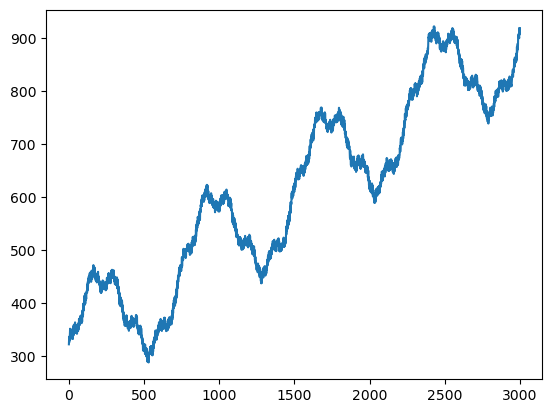

In [24]:
data = get_time_series_data(3000)
plt.plot(data)
plt.show()

In [27]:
data[:10]

[321.68803402462277,
 329.08345067123884,
 325.14581227305735,
 336.3406090054964,
 328.6322227727207,
 329.21866591030965,
 337.9747399967511,
 345.69417834532084,
 351.1532569174562,
 342.15909867982515]

In [25]:
import torch
from sklearn.model_selection import train_test_split

In [28]:
def get_time_series_datasets(features, ts_len):
    ts = get_time_series_data(ts_len)
    X = []
    Y = []
    for i in range(features + 1, ts_len):
        X.append(ts[i - (features + 1): i-1])
        Y.append(ts[i])
    X_train, X_test, Y_train, Y_test = train_test_split(
        X
        , Y
        , test_size=0.3
        , shuffle=False
    )
    X_val, X_test, Y_val, Y_test = train_test_split(
        X_test
        , Y_test
        , test_size=0.5
        , shuffle=False
    )
    x_train = torch.tensor(data=X_train)
    y_train = torch.tensor(data=Y_train)
    x_val = torch.tensor(data=X_val)
    y_val = torch.tensor(data=Y_val)
    x_test = torch.tensor(data=X_test)
    y_test = torch.tensor(data=Y_test)
    return x_train, x_val, x_test, y_train, y_val, y_test

In [53]:
import torch.nn.functional as F
class FCNN(torch.nn.Module):
    def __init__(self, n_inp, l_1, l_2, n_out):
        super(FCNN, self).__init__()
        self.lin1 = torch.nn.Linear(n_inp, l_1)
        self.lin2 = torch.nn.Linear(l_1, l_2)
        self.lin3 = torch.nn.Linear(l_2, n_out)
    def forward(self, x):
        x1 = F.relu(self.lin1(x))
        x2 = F.relu(self.lin2(x1))
        y = self.lin3(x2)
        return y

In [71]:
features = 256
ts_len = 10000

x_train, x_val, x_test, y_train, y_val, y_test = get_time_series_datasets(features, ts_len)

In [72]:
print(x_train.size())
print(x_train[0].size())
print(x_train[10].size())

torch.Size([6820, 256])
torch.Size([256])
torch.Size([256])


In [73]:
y_train[0]

tensor(449.0209)

In [74]:
net = FCNN(n_inp=features, l_1=64, l_2=32, n_out=1)
net.train()

FCNN(
  (lin1): Linear(in_features=256, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=32, bias=True)
  (lin3): Linear(in_features=32, out_features=1, bias=True)
)

In [75]:
optimizer = torch.optim.Adam(params = net.parameters())
loss_func = torch.nn.MSELoss()

In [76]:
best_model = None
min_val_loss = 1_000_000
training_loss = []
validation_loss = []

In [77]:
import copy 

for t in range(10_000):
    prediction = net(x_train)
    loss = loss_func(prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    val_prediction = net(x_val)
    val_loss = loss_func(val_prediction, y_val)
    training_loss.append(loss.item())
    validation_loss.append(val_loss.item())
    if val_loss.item() < min_val_loss:
        best_model = copy.deepcopy(net)
        min_val_loss = val_loss.item()
    if t % 1000 == 0:
        print(f'epoch {t}: train - {round(loss.item(), 4)}, val: {round(val_loss.item(), 4)}')

/Users/prakanan/opt/miniconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([6820])) that is different to the input size (torch.Size([6820, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/prakanan/opt/miniconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1461])) that is different to the input size (torch.Size([1461, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0: train - 887528.5625, val: 1376884.0
epoch 1000: train - 300308.8125, val: 77989.5156
epoch 2000: train - 233371.3906, val: 206943.7969
epoch 3000: train - 193601.9531, val: 309147.5938
epoch 4000: train - 168879.4844, val: 602776.6875
epoch 5000: train - 165448.4531, val: 653979.6875
epoch 6000: train - 164109.7656, val: 652230.5
epoch 7000: train - 164107.4219, val: 670404.9375
epoch 8000: train - 165237.8906, val: 675937.5625
epoch 9000: train - 164743.9062, val: 652543.125


In [78]:
net.eval()

FCNN(
  (lin1): Linear(in_features=256, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=32, bias=True)
  (lin3): Linear(in_features=32, out_features=1, bias=True)
)

In [79]:
loss_func(best_model(x_test), y_test).item()

/Users/prakanan/opt/miniconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1462])) that is different to the input size (torch.Size([1462, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


24153.048828125

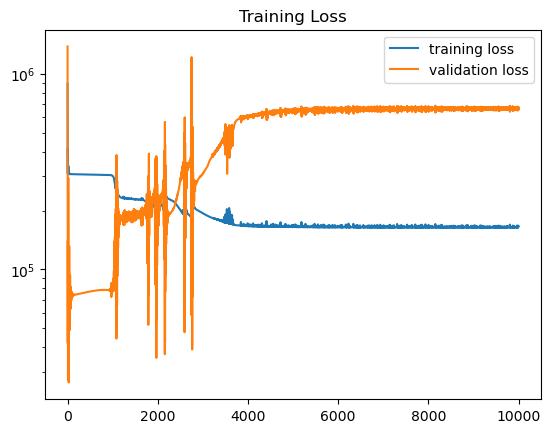

In [80]:
plt.title("Training Loss")
plt.yscale("log")
plt.plot(training_loss, label = 'training loss')
plt.plot(validation_loss, label = 'validation loss')
plt.legend()